# CSE 158 HW 1
#### Hongtao Jiang A13760857
#### 10/12/19

Before answering the questions, I imported all the models that will be used.

In [1]:
import pandas as pd
import numpy
import urllib
import scipy.optimize
import random
from sklearn import svm
from sklearn import linear_model
from urllib.request import urlopen
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Question 1

Question: What is the distribution of ratings in the dataset? That is, how many 1-star, 2-star, 3-star (etc.) reviews are there? You may write out the values or include a simple plot (1 mark).

Firstly, I imported the data and checked its dimensions.

In [2]:
df_initial = pd.read_csv('amazon_reviews_us_Gift_Card_v1_00.csv',sep='\t')
print('Dataframe dimensions:', df_initial.shape)

Dataframe dimensions: (148310, 15)


In [3]:
display(df_initial[:5])

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,24371595,R27ZP1F1CD0C3Y,B004LLIL5A,346014806,Amazon eGift Card - Celebrate,Gift Card,5,0,0,N,Y,Five Stars,Great birthday gift for a young adult.,2015-08-31
1,US,42489718,RJ7RSBCHUDNNE,B004LLIKVU,473048287,Amazon.com eGift Cards,Gift Card,5,0,0,N,Y,Gift card for the greatest selection of items ...,It's an Amazon gift card and with over 9823983...,2015-08-31
2,US,861463,R1HVYBSKLQJI5S,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,5,0,0,N,Y,Five Stars,Good,2015-08-31
3,US,25283295,R2HAXF0IIYQBIR,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,1,0,0,N,Y,One Star,Fair,2015-08-31
4,US,397970,RNYLPX611NB7Q,B005ESMGV4,379368939,"Amazon.com Gift Cards, Pack of 3 (Various Desi...",Gift Card,5,0,0,N,Y,Five Stars,I can't believe how quickly Amazon can get the...,2015-08-31


#### Answer for Question 1:

1 Star Rating: 4766
2 Star Rating: 1560
3 Star Rating: 3147
4 Star Rating: 9808
5 Star Rating: 129029


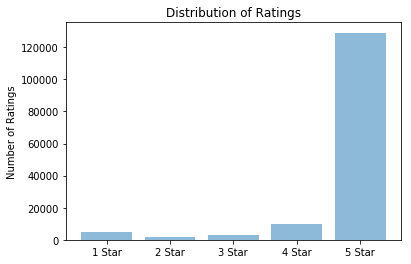

In [4]:
print('1 Star Rating:', df_initial[df_initial.star_rating == 1].shape[0])
print('2 Star Rating:', df_initial[df_initial.star_rating == 2].shape[0])
print('3 Star Rating:', df_initial[df_initial.star_rating == 3].shape[0])
print('4 Star Rating:', df_initial[df_initial.star_rating == 4].shape[0])
print('5 Star Rating:', df_initial[df_initial.star_rating == 5].shape[0])

objects = ('1 Star', '2 Star', '3 Star', '4 Star', '5 Star')
y_pos = np.arange(len(objects))
performance = [df_initial[df_initial.star_rating == 1].shape[0],
               df_initial[df_initial.star_rating == 2].shape[0],
               df_initial[df_initial.star_rating == 3].shape[0],
               df_initial[df_initial.star_rating == 4].shape[0],
               df_initial[df_initial.star_rating == 5].shape[0]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Ratings')
plt.title('Distribution of Ratings')

plt.show()

## Question 2

Question: Repeat the above question, but generate the distribution (a) only for reviews that are ‘verified,’ and (b) only for reviews that are not verified. Write out the values or generate a plot to show the difference between these distributions (1 mark).

#### Answer for Question 2:

#### (a) only for reviews that are ‘verified’ :

In [5]:
df_verified = df_initial[df_initial.verified_purchase == 'Y']

1 Star Rating: 3977
2 Star Rating: 1335
3 Star Rating: 2775
4 Star Rating: 8890
5 Star Rating: 118312


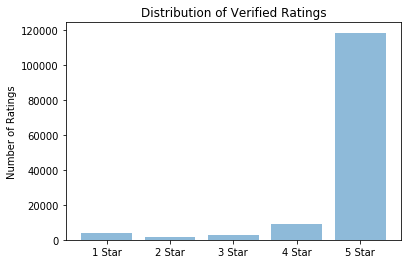

In [6]:
print('1 Star Rating:', df_verified[df_verified.star_rating == 1].shape[0])
print('2 Star Rating:', df_verified[df_verified.star_rating == 2].shape[0])
print('3 Star Rating:', df_verified[df_verified.star_rating == 3].shape[0])
print('4 Star Rating:', df_verified[df_verified.star_rating == 4].shape[0])
print('5 Star Rating:', df_verified[df_verified.star_rating == 5].shape[0])
objects = ('1 Star', '2 Star', '3 Star', '4 Star', '5 Star')
y_pos = np.arange(len(objects))
performance = [df_verified[df_verified.star_rating == 1].shape[0],
               df_verified[df_verified.star_rating == 2].shape[0],
               df_verified[df_verified.star_rating == 3].shape[0],
               df_verified[df_verified.star_rating == 4].shape[0],
               df_verified[df_verified.star_rating == 5].shape[0]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Ratings')
plt.title('Distribution of Verified Ratings')

plt.show()

#### (b) only for reviews that are not verified:

In [7]:
df_unverified = df_initial[df_initial.verified_purchase == 'N']

1 Star Rating: 789
2 Star Rating: 225
3 Star Rating: 372
4 Star Rating: 918
5 Star Rating: 10717


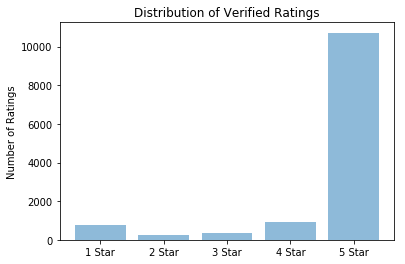

In [8]:
print('1 Star Rating:', df_unverified[df_unverified.star_rating == 1].shape[0])
print('2 Star Rating:', df_unverified[df_unverified.star_rating == 2].shape[0])
print('3 Star Rating:', df_unverified[df_unverified.star_rating == 3].shape[0])
print('4 Star Rating:', df_unverified[df_unverified.star_rating == 4].shape[0])
print('5 Star Rating:', df_unverified[df_unverified.star_rating == 5].shape[0])
objects = ('1 Star', '2 Star', '3 Star', '4 Star', '5 Star')
y_pos = np.arange(len(objects))
performance = [df_unverified[df_unverified.star_rating == 1].shape[0],
               df_unverified[df_unverified.star_rating == 2].shape[0],
               df_unverified[df_unverified.star_rating == 3].shape[0],
               df_unverified[df_unverified.star_rating == 4].shape[0],
               df_unverified[df_unverified.star_rating == 5].shape[0]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Ratings')
plt.title('Distribution of Verified Ratings')

plt.show()

#### The difference between (a) and (b):

I showed the difference in two ways.

1. The first way is to compute the difference and show it in a bar chart for each star rating:

1 Star Rating Difference: 3188
2 Star Rating Difference: 1110
3 Star Rating Difference: 2403
4 Star Rating Difference: 7972
5 Star Rating Difference: 107595


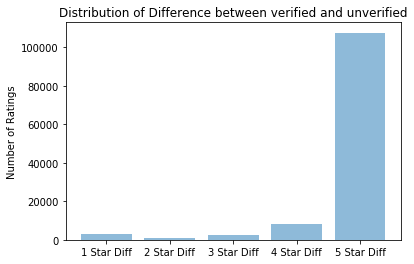

In [9]:
diff1 = df_verified[df_verified.star_rating == 1].shape[0] - df_unverified[df_unverified.star_rating == 1].shape[0]
diff2 = df_verified[df_verified.star_rating == 2].shape[0] - df_unverified[df_unverified.star_rating == 2].shape[0]
diff3 = df_verified[df_verified.star_rating == 3].shape[0] - df_unverified[df_unverified.star_rating == 3].shape[0]
diff4 = df_verified[df_verified.star_rating == 4].shape[0] - df_unverified[df_unverified.star_rating == 4].shape[0]
diff5 = df_verified[df_verified.star_rating == 5].shape[0] - df_unverified[df_unverified.star_rating == 5].shape[0]


print('1 Star Rating Difference:', diff1)
print('2 Star Rating Difference:', diff2)
print('3 Star Rating Difference:', diff3)
print('4 Star Rating Difference:', diff4)
print('5 Star Rating Difference:', diff5)
objects = ('1 Star Diff', '2 Star Diff', '3 Star Diff', '4 Star Diff', '5 Star Diff')
y_pos = np.arange(len(objects))
performance = [diff1, diff2, diff3,diff4, diff5]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Ratings')
plt.title('Distribution of Difference between verified and unverified')

plt.show()

2. The second way is to put (a)'s and (b)'s bar chart together to visualize the difference.

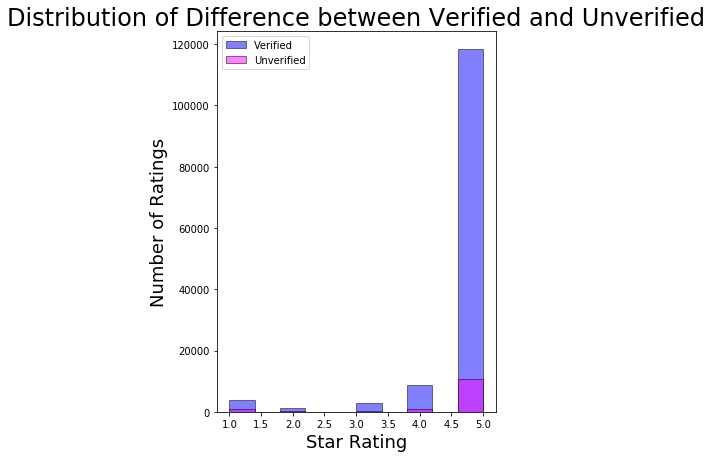

In [10]:
df_initial[df_initial['verified_purchase']=='Y'].star_rating.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(5,7))
df_initial[df_initial['verified_purchase']=='N'].star_rating.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(5,7))
plt.legend(labels=['Verified','Unverified'])
plt.title('Distribution of Difference between Verified and Unverified', size=24)
plt.xlabel('Star Rating', size=18)
plt.ylabel('Number of Ratings', size=18);

## Question 3

Question: Train a simple predictor to predict the star rating using two features:

star rating ≃ θ0 + θ1 × [review is verified] + θ2 × [review length]

Report the values of θ0, θ1, and θ2. Briefly describe your interpretation of these values, i.e., what do θ0, θ1, and θ2 represent? Explain these in terms of the features and labels, e.g. if the coefficient of ‘review length’ is negative, what would that say about verified versus unverified reviews (1 mark)?

#### Answer for Question 3:

I created two new columns here: one is **if_verified** as a binary column to show if the review is verified. Other one is **review_length**, which represents the length of the review string.

In [11]:
df_initial['if_verified'] = [1 if d == 'Y' else 0 for d in df_initial.verified_purchase]
df_initial['review_length'] = [len(str(s)) for s in df_initial.review_body]
X = df_initial[['if_verified','review_length']]
y = df_initial['star_rating']

lr_q3 = LinearRegression()
lr_q3.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
coeff_df = pd.DataFrame(lr_q3.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
if_verified,0.049858
review_length,-0.001245


In [13]:
lr_q3.intercept_

4.845035348553754

From the code above, I computed θ0 = 4.845035348553754, θ1 = 0.049858, and θ2 = -0.001245. 

For θ0, it is the expected mean value of star rating when all both if_verified and review length equals to zero. 

For θ1, it is the weight of if_verified in the regression model. More sepecifically, θ1 represents the mean change in the response variable, which is the star rating, for one unit of change in the predictor variable if_verified while holding other predictors review_length in the model constant.

For θ2, it is the weight of review_length in the regression model. More sepecifically, θ2 represents the mean change in the response variable, which is the star rating, for one unit of change in the predictor variable review_length while holding other predictors if_verified in the model constant.

Since θ2 is negative, it shows that the length of a review is inversely proportional to its star rating.

## Question 4

Question: Train another predictor that only uses one feature:

star rating ≃ θ0 + θ1 × [review is verified]

Report the values of θ0 and θ1. Note that coefficient you found here might be quite different (i.e., much larger or smaller) than the one from Question 3, even though these coefficients refer to the same feature.
Provide an explanation as to why these coefficients might vary so significantly (1 mark)

#### Answer for Question 4:

In [14]:
X_2 = df_initial[['if_verified']]
y_2 = df_initial['star_rating']

lr_q4 = LinearRegression()
lr_q4.fit(X_2, y_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print('θ0 =',lr_q4.intercept_)
print('θ1 =',lr_q4.coef_[0])

θ0 = 4.578142999769605
θ1 = 0.16793391705290198


The Coefficient θ1 becomes much larger and θ0 becomes smaller comparing to what we have in question 3. Since we do not have review length as our predictor variable any more, we only have one predictor variable if_verified. Recall that length of a review is inversely proportional to its star rating, removing a predictor variable that is inversely-proportional to the response variable will lead to an increase in the coefficient of other proportional predictor variable. Hence, θ1 increases. Moreover, since there are no inversely-proportional predictor variable in the model any more, the intercept θ0 will decrease, because the expected mean value of star rating is higher without the review_length as a predictor.

## Question 5 & 6

Question 5: Split the data into two fractions – the first 90% for training, and the remaining 10% testing (based on the order they appear in the file). Train the same model as in Question 4 on the training set only. What is the model’s MSE on the training and on the test set (1 mark)?

Question 6: Using the test set from Question 5, report the Mean Absolute Error (MAE) and R2 coefficient for your predictor (on the test set) (1 mark).

#### Answer for Question 5 & 6:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.1,shuffle=False)

lr_q5 = LinearRegression()
lr_q5.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred_test = lr_q5.predict(X_test)
y_pred_train = lr_q5.predict(X_train)

In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error on Test:', metrics.mean_squared_error(y_test, y_pred_test))
print('Mean Squared Error on Train:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

Mean Absolute Error: 0.6221007247299694
Mean Squared Error on Test: 0.9723851990304213
Mean Squared Error on Train: 0.6554842196694357
Root Mean Squared Error: 0.9860959380457975
R^2: -0.048115873593612246


## Question 8

Question: First, let’s train a predictor that estimates whether a review is verified using the rating and the length: 

p(review is verified) ≃ σ(θ0 + θ1 × [star rating] + θ2 × [review length])

Train a logistic regressor to make the above prediction (you may use a logistic regression library with de- fault parameters, e.g. linear model.LogisticRegression() from sklearn). Report the classification accuracy of this predictor. Report also the proportion of labels that are positive (i.e., the proportion of reviews that are verified) and the proportion of predictions that are positive (1 mark).

#### Answer for Question 8:

In [19]:
X_8 = df_initial[['star_rating','review_length']]
y_8 = df_initial['if_verified']

In [20]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X_8, y_8, test_size=0.1,shuffle=False)

cl = linear_model.LogisticRegression()
cl.fit(X_train_8, y_train_8)

train_predictions = cl.predict(X_train_8)
test_predictions = cl.predict(X_test_8)

In [21]:
y_test_8.mean()

0.5595711684984155

In [22]:
print('Accuracy Score(TRAIN SET):', metrics.accuracy_score(y_train_8, train_predictions))
print('Accuracy Score(TEST SET):', metrics.accuracy_score(y_test_8, test_predictions))

Accuracy Score(TRAIN SET): 0.9511758403943692
Accuracy Score(TEST SET): 0.559840873845324


In [23]:
print('TRAIN SET: proportion of labels that are positive :', len(y_train_8[y_train_8 == 1])/len(y_train_8))
print('TEST SET: proportion of labels that are positive :', len(y_test_8[y_test_8 == 1])/len(y_test_8))

print('TRAIN SET: proportion of predictions that are positive :', len(train_predictions[train_predictions == 1])/len(train_predictions))
print('TEST SET: proportion of predictions that are positive :', len(test_predictions[test_predictions == 1])/len(test_predictions))

TRAIN SET: proportion of labels that are positive : 0.9513856112197424
TEST SET: proportion of labels that are positive : 0.5595711684984155
TRAIN SET: proportion of predictions that are positive : 0.9996553765011724
TEST SET: proportion of predictions that are positive : 0.9990560312858202


## Question 9

Question:Considering same prediction problem as above, can you come up with a more accurate predictor (e.g. using features from the text, timestamp, etc.)? Write down the feature vector you design, and report its train/test accuracy (1 mark).

#### Answer for Question 9:

For this question, I added four new features:

1. **word_number**: represents the number of words used in the review.
2. **month**: month of the review date
3. **year**: year of the review date
4. **day**: day of the review date

In [24]:
import datetime
df_initial['word_number'] = [len(str(s).split()) for s in df_initial.review_body]
df_initial = df_initial.dropna()
df_initial['month'] = [datetime.datetime.strptime(str(a), "%Y-%m-%d").month for a in df_initial.review_date]
df_initial['year'] = [datetime.datetime.strptime(str(a), "%Y-%m-%d").year for a in df_initial.review_date]
df_initial['day'] = [datetime.datetime.strptime(str(a), "%Y-%m-%d").day for a in df_initial.review_date]

In [25]:
X_9 = df_initial[['star_rating','review_length','word_number','month','year','day']]
y_9 = df_initial['if_verified']

X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X_9, y_9, test_size=0.1, shuffle=False)

cl_9 = linear_model.LogisticRegression(C=1.0,solver = 'lbfgs',multi_class = 'ovr')
cl_9.fit(X_train_9, y_train_9)

train_predictions_9 = cl_9.predict(X_train_9)
test_predictions_9 = cl_9.predict(X_test_9)

print('Accuracy Score:', metrics.accuracy_score(y_test_9, test_predictions_9))

Accuracy Score: 0.5601105791922325


The Accuracy I got after adding these four new features is 0.5601105791922325, which is slightly higher than the previous one.